In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Create some data

In [2]:
x = np.array([0., 1., 2., 3., 4., 5., 6., 7.])
y = np.array([-.82, -.94, -.12, .26, .36, .64, 1.02, 1.])

### Visualize the Data

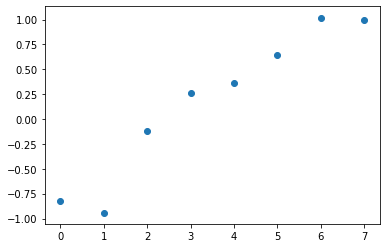

In [3]:
plt.scatter(x,y)

#### Gradient Descent Algorithm

In [4]:
data = pd.DataFrame({ 'x': x, 'y': y})

In [14]:
def gradient_descent( initial_weights, features, target, datafile, learning_rate, tolerance ):
    
    #Initialized our weights 
    weights = initial_weights
    
    #Convert input into matrix
    datafile['constant'] = 1
    features = ['constant'] + features
    feature_matrix = datafile[features].as_matrix()
    
    #Initialize target variable
    target_variable = datafile[target]
    
    #Gradient Descent
    converged = False
    
    while not converged:
        
        predictions = np.dot(feature_matrix, weights)
        error = target_variable - predictions
        gradient_sum_squares = 0
        
        
        for i in range(len(weights)):
            
            derivative = np.dot(error, feature_matrix[:,i])
            weights[i] = weights[i] + (2*learning_rate*derivative)
            
            gradient_sum_squares += derivative**2 
#         print(gradient_sum_squares)
#         print(weights)
        
        gradient_sum_squares = np.sqrt(gradient_sum_squares)
                                
        if gradient_sum_squares < tolerance:
            converged = True
    
    return weights

In [18]:
initial_weights = [0, 0]
features = ['x']
target = 'y'
learning_rate = 0.005
tolerance = .0001

In [19]:
gradient_descent(initial_weights, features, target, data, learning_rate, tolerance)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


[-0.8632925033139001, 0.296658363891962]

In [20]:
from sklearn import linear_model

In [21]:
model = linear_model.LinearRegression(fit_intercept=True)

In [22]:
model.fit(data[['x']],data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
 model.coef_

array([0.29666667])

In [24]:
model.intercept_

-0.8633333333333335

In [ ]:
plt.scatter()